In [50]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
import numpy as np
import pandas as pd

In [51]:
def summary(df) :
    tf = pd.DataFrame({'데이터크기' : df.shape[0],
                       '데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측비율(%)' : (df.isnull().sum()/len(df)).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [52]:
pop = pd.read_csv('../data/state-population.csv')
areas = pd.read_csv('../data/state-areas.csv')
abbrevs = pd.read_csv('../data/state-abbrevs.csv')

In [53]:
pop.head(3)
areas.head(3)
abbrevs.head(3)

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


Rank US states and territories by their 2010 population density. We clearly have the data here to find this result, but we’ll have to combine the datasets to get it.

In [54]:
for i in [pop, areas, abbrevs]:
    summary(i)

,데이터크기,데이터형태(dtypes),결측치 수(null),결측비율(%),고유값 수(nunique)
state/region,2544,object,0,0.00,53
ages,2544,object,0,0.00,2
year,2544,int64,0,0.00,24
population,2544,float64,20,0.79,2524


,데이터크기,데이터형태(dtypes),결측치 수(null),결측비율(%),고유값 수(nunique)
state,52,object,0,0.0,52
area (sq. mi),52,int64,0,0.0,52


,데이터크기,데이터형태(dtypes),결측치 수(null),결측비율(%),고유값 수(nunique)
state,51,object,0,0.0,51
abbreviation,51,object,0,0.0,51


In [55]:
merged = pd.merge(pop, abbrevs, how='left', left_on='state/region', right_on='abbreviation')
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [56]:
merged = merged.drop('abbreviation', axis=1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [57]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [58]:
merged['population'].isnull().sum()
merged[merged['population'].isnull()].shape
merged[merged['population'].isnull()].head()

20

(20, 5)

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [59]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [60]:
summary(merged)

,데이터크기,데이터형태(dtypes),결측치 수(null),결측비율(%),고유값 수(nunique)
state/region,2544,object,0,0.00,53
ages,2544,object,0,0.00,2
year,2544,int64,0,0.00,24
population,2544,float64,20,0.79,2524
state,2544,object,96,3.77,51


In [61]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [62]:
merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States
2540,USA,under18,2011,73902222.0,United States
2541,USA,total,2011,311582564.0,United States
2542,USA,under18,2012,73708179.0,United States


In [63]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [64]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [65]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [66]:
final.dropna(inplace=True)
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [67]:
summary(final)

,데이터크기,데이터형태(dtypes),결측치 수(null),결측비율(%),고유값 수(nunique)
state/region,2476,object,0,0.0,52
ages,2476,object,0,0.0,2
year,2476,int64,0,0.0,24
population,2476,float64,0,0.0,2476
state,2476,object,0,0.0,52
area (sq. mi),2476,float64,0,0.0,52


## 2011년도 단위당 인구밀도가 가장 적은 state 3개

In [70]:
data

,state/region,ages,year,population,state,area (sq. mi),인구밀도
4,AL,under18,2011,1125763.0,Alabama,52423.0,21.474601
5,AL,total,2011,4801627.0,Alabama,52423.0,91.593900
92,AK,under18,2011,188329.0,Alaska,656425.0,0.286901
93,AK,total,2011,723375.0,Alaska,656425.0,1.101992
98,AZ,under18,2011,1616353.0,Arizona,114006.0,14.177789
...,...,...,...,...,...,...,...
2397,WI,total,2011,5708785.0,Wisconsin,65503.0,87.153031
2402,WY,total,2011,567329.0,Wyoming,97818.0,5.799843
2403,WY,under18,2011,135407.0,Wyoming,97818.0,1.384275
2492,PR,under18,2011,869327.0,Puerto Rico,3515.0,247.319203


In [79]:
data = final.loc[final['year'] == 2011, :]
data['인구밀도'] = final['population']/final['area (sq. mi)']
data1 = data.loc[data['ages'] == 'under18', ['state','인구밀도']].sort_values('인구밀도')

data1.index = np.array(range(0, len(data1)))
data1

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,인구밀도
0,Alaska,0.286901
1,Wyoming,1.384275
2,Montana,1.516376
3,North Dakota,2.154857
4,South Dakota,2.644520
5,New Mexico,4.247884
6,Idaho,5.127611
7,Nebraska,5.957651
8,Nevada,5.962321
9,Maine,7.594230


In [25]:
final[(final['year'] == 2010) & (final['ages'] == 'total')].shape

(52, 6)

In [26]:
data2010 = final.query('year == 2010 & ages == "total"')
data2010.head()
data2010.shape

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


(52, 6)

In [27]:
data2010.set_index('state', inplace=True)

In [28]:
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [29]:
density = data2010['population'] / data2010['area (sq. mi)']
density

state
Alabama                   91.287603
Alaska                     1.087509
Arizona                   56.214497
Arkansas                  54.948667
California               228.051342
Colorado                  48.493718
Connecticut              645.600649
Delaware                 460.445752
District of Columbia    8898.897059
Florida                  286.597129
Georgia                  163.409902
Hawaii                   124.746707
Idaho                     18.794338
Illinois                 221.687472
Indiana                  178.197831
Iowa                      54.202751
Kansas                    34.745266
Kentucky                 107.586994
Louisiana                 87.676099
Maine                     37.509990
Maryland                 466.445797
Massachusetts            621.815538
Michigan                 102.015794
Minnesota                 61.078373
Mississippi               61.321530
Missouri                  86.015622
Montana                    6.736171
Nebraska              

In [30]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

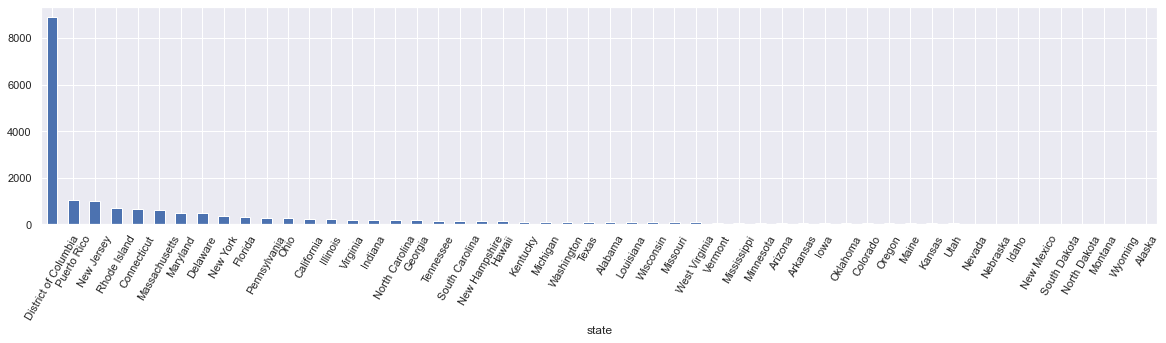

In [31]:
density.plot.bar(rot='60', figsize=(20,4))

In [32]:
density.nlargest(10)
density.nsmallest(10)

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
Maryland                 466.445797
Delaware                 460.445752
New York                 356.094135
Florida                  286.597129
dtype: float64

state
Alaska           1.087509
Wyoming          5.768079
Montana          6.736171
North Dakota     9.537565
South Dakota    10.583512
New Mexico      16.982737
Idaho           18.794338
Nebraska        23.654153
Nevada          24.448796
Utah            32.677188
dtype: float64

In [33]:
density

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
Maryland                 466.445797
Delaware                 460.445752
New York                 356.094135
Florida                  286.597129
Pennsylvania             275.966651
Ohio                     257.549634
California               228.051342
Illinois                 221.687472
Virginia                 187.622273
Indiana                  178.197831
North Carolina           177.617157
Georgia                  163.409902
Tennessee                150.825298
South Carolina           144.854594
New Hampshire            140.799273
Hawaii                   124.746707
Kentucky                 107.586994
Michigan                 102.015794
Washington                94.557817
Texas                     93.987655
Alabama                   91.287603
Louisiana             

In [35]:
data2010['population'].nsmallest(10)

state
Wyoming                  564222.0
District of Columbia     605125.0
Vermont                  625793.0
North Dakota             674344.0
Alaska                   713868.0
South Dakota             816211.0
Delaware                 899711.0
Montana                  990527.0
Rhode Island            1052669.0
New Hampshire           1316614.0
Name: population, dtype: float64